<a href="https://colab.research.google.com/github/GustavoLLima/treinamento-h2ia/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
!ls

Mounted at /content/drive/
drive  sample_data


In [53]:
import pandas as pd

# dataset = pd.read_csv("drive/My Drive/mushroom_dataset/agaricus-lepiota.data", header=None)
dataset = pd.read_csv("drive/My Drive/mushroom_dataset/2agaricus-lepiota.data")
dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# le = LabelEncoder()
# le.fit(["paris", "paris", "tokyo", "amsterdam"])
# list(le.classes_)
# le.transform(["tokyo", "tokyo", "paris"])
# list(le.inverse_transform([2, 2, 1]))

dataset = dataset.apply(LabelEncoder().fit_transform)
#OneHotEncoder().fit_transform(dataset)

dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [55]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# X = dataset.copy()
# X = X.drop(0, axis=1)
# features = X.iloc()

# scaler = MinMaxScaler(feature_range=(0,1))
# features = scaler.fit_transform(features)

# X = features

# y = dataset[0].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [57]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
X = X.iloc[: , 1:]
#y = dataset[0].values
y = dataset['target']
#y = dataset[0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [58]:
print(X)
#print(X_test)
#print(y_train)
#print(y_test)

#print(len(X_train) + len(X_test))
#print(len(y_train) + len(y_test))

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

In [60]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [61]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3257,2,3,3,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,2,4,0
6271,2,2,2,0,7,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
5549,5,3,4,0,8,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,4
109,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,3
7464,3,3,4,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,5,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3
3284,5,0,3,0,2,1,0,0,7,0,...,1,0,6,0,2,1,2,1,4,0
7808,3,2,4,0,7,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,4
5422,2,3,9,0,2,1,0,0,2,0,...,1,0,4,0,2,1,2,1,4,0


In [62]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 1, 0])

In [63]:
clf.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[1389,    0],
       [   0, 1292]])

In [66]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

In [67]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['p','e']))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1389
           e       1.00      1.00      1.00      1292

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [69]:
feature_names = X.columns
feature_names

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-bewlow-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [70]:
clf.feature_importances_

array([0.        , 0.        , 0.00441134, 0.02905418, 0.        ,
       0.        , 0.        , 0.14418817, 0.26739934, 0.02271817,
       0.10888847, 0.00494478, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38153615,
       0.        , 0.0368594 ])

In [71]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)

In [77]:
features = list(feature_importance[feature_importance[0]>=0].index)
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-bewlow-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

<Axes: >

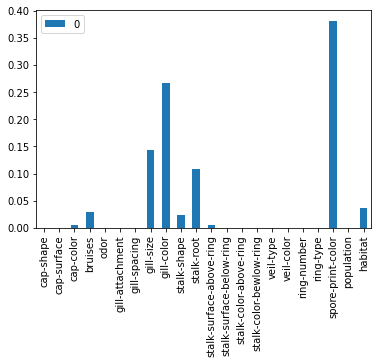

In [78]:
feature_importance.head(22).plot(kind='bar')

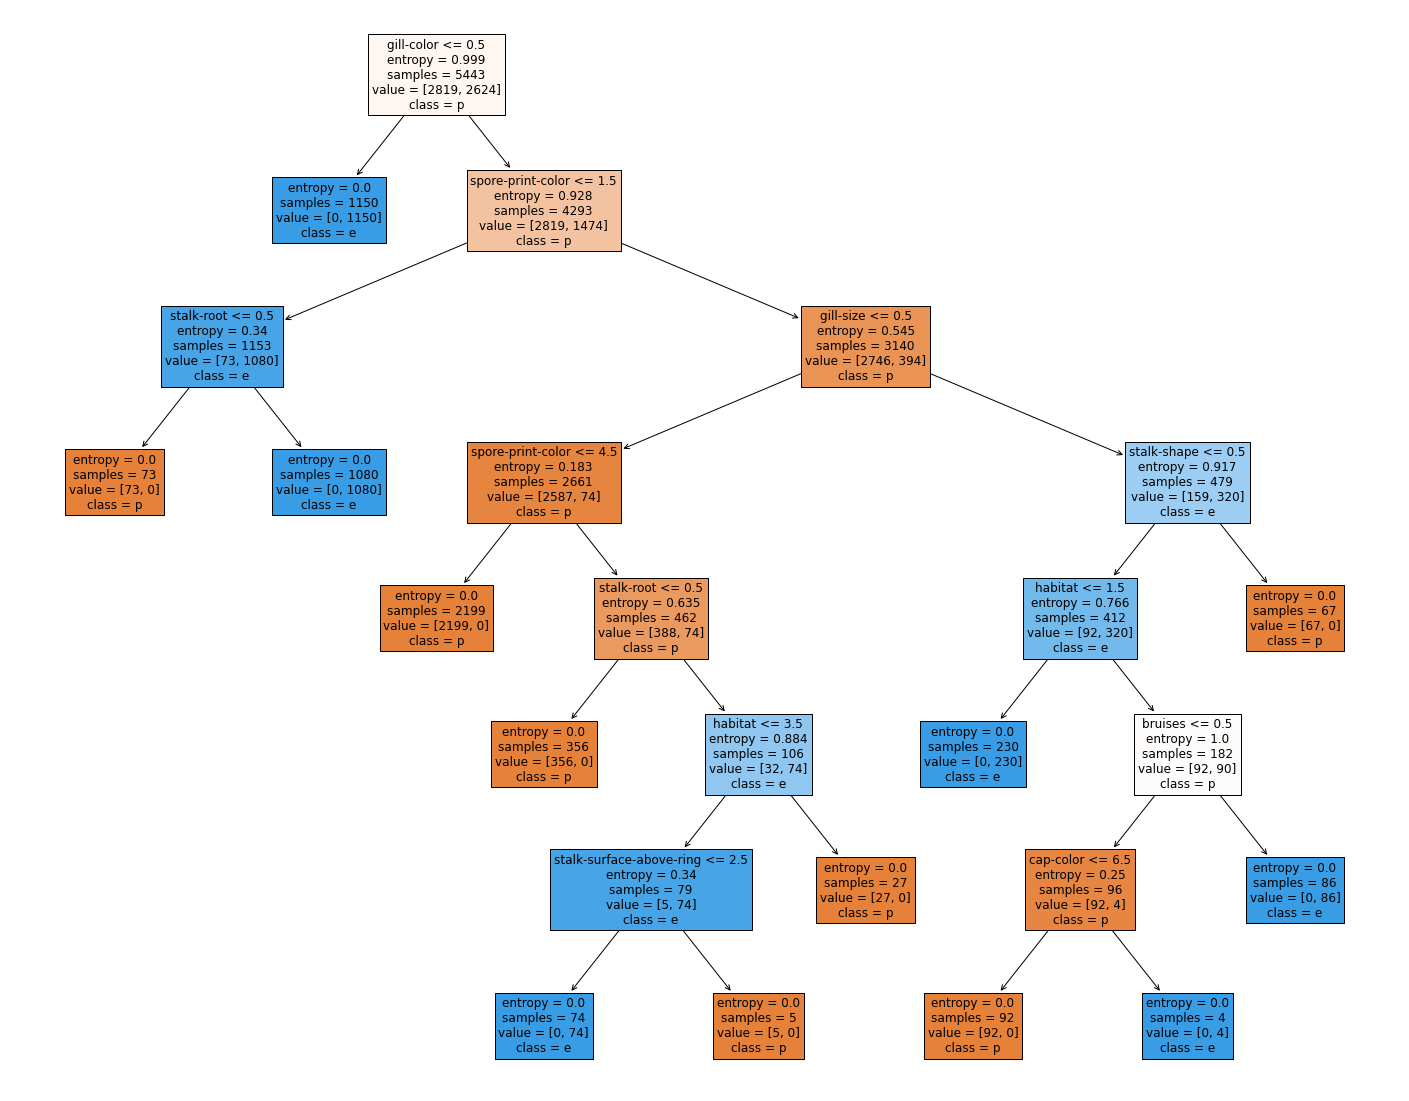

In [74]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'p', 1:'e'}, filled=True,fontsize=12)